In [12]:
import intake
import healpy as hp
import matplotlib.pyplot as plt
from easygems.healpix import attach_coords

In [7]:
hera_cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/internal.yaml")
hera = hera_cat.HERA5.to_dask().pipe(attach_coords)
# Contains modified Copernicus Climate Change Service information 2023. 
# Neither the European Commission nor ECMWF is responsible for any use 
# that may be made of the Copernicus information or data it contains.
# This dataset is on healpix level 7

/usr/local/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [25]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/online.yaml")
zoom = 7 
icon = cat.ICON.ngc3028(zoom=zoom).to_dask().pipe(attach_coords)

timeslice = slice("2020-02-01", "2023-01-31")
t_mean_model = icon.sel(time=timeslice).tas.mean(dim="time")
t_mean_obs = hera.sel(time=timeslice)["2t"].mean(dim="time") 







/usr/local/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


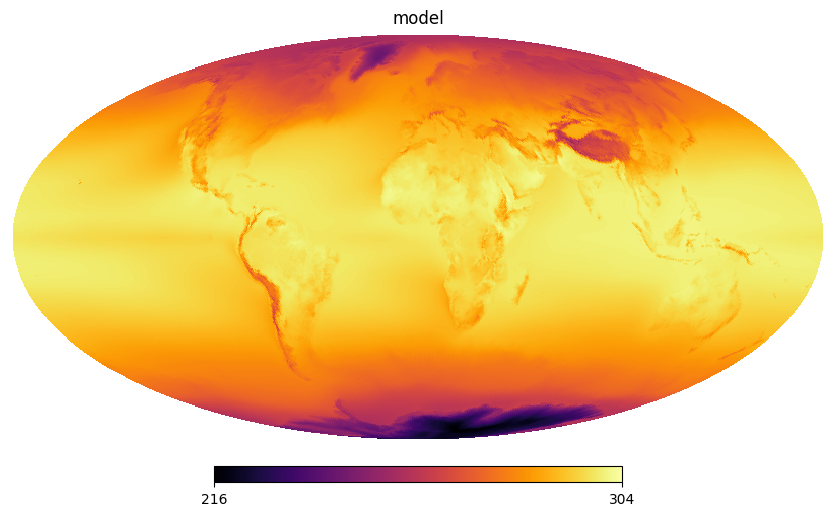

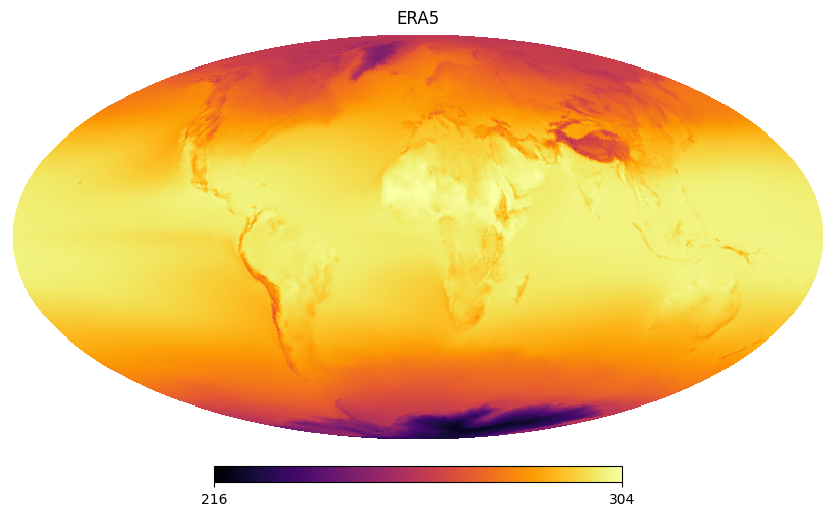

In [15]:
params = dict(flip='geo', nest=True, cmap='inferno', min=216, max=304)
hp.mollview(t_mean_model, **params)
plt.title("model")
plt.savefig("images/model_tas.png")
hp.mollview(t_mean_obs, **params)
plt.title("ERA5")
plt.savefig("images/era_tas.png")

/usr/local/lib/python3.11/site-packages/xarray/core/indexing.py:1430: PerformanceWarning: Slicing with an out-of-order index is generating 107 times more chunks
  return self.array[key]


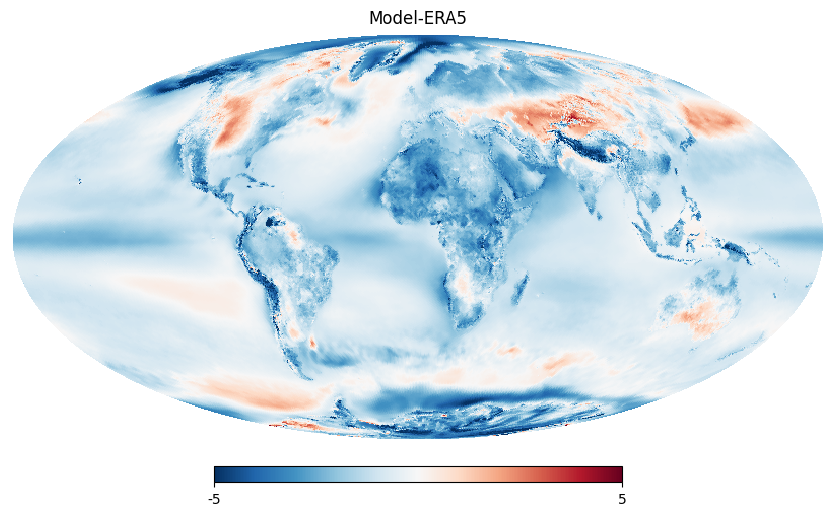

In [24]:
params_diff = dict(cmap="RdBu_r", min=-5, max=5, flip="geo", nest=True)
hp.mollview(t_mean_model-t_mean_obs, **params_diff)
plt.title("Model-ERA5")
plt.savefig("images/t_mean_diff.png", dpi=120)

In [32]:

icon_tas_ts=cat.ICON.ngc3028.to_dask().tas.mean(dim='cell')
timeslice = slice(icon_tas_ts.time[0],icon_tas_ts.time[-1])
hera_tas_ts=hera['2t'].sel(time=timeslice).mean(dim='cell')


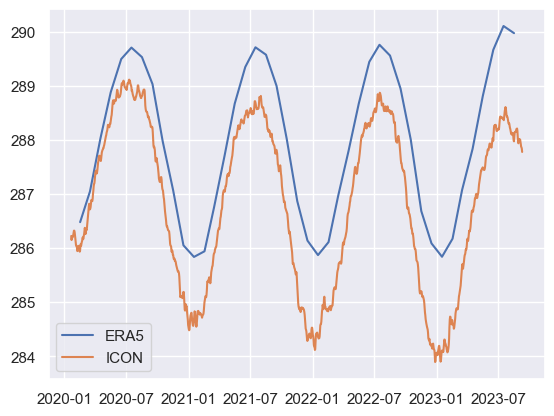

In [36]:
import seaborn as sns
sns.set_theme()
plt.plot(hera_tas_ts.time, hera_tas_ts, label="ERA5")
plt.plot(icon_tas_ts.time, icon_tas_ts, label="ICON")
plt.legend()
plt.savefig("images/tas_ts_comparison.png")

In [40]:
pr_mean_model = icon.sel(time=timeslice)['pr'].mean(dim="time")
pr_mean_obs = hera.sel(time=timeslice)["tp"].mean(dim="time")

In [39]:
params_diff = dict(cmap="RdBu_r", min=-5, max=5, flip="geo", nest=True)
hp.mollview(t_mean_model-t_mean_obs, **params_diff)
plt.title("Model-ERA5")
plt.savefig("images/t_mean_diff.png", dpi=120)

msl Mean sea level pressure
sp Surface pressure
tp Total precipitation


/usr/local/lib/python3.11/site-packages/xarray/core/indexing.py:1430: PerformanceWarning: Slicing with an out-of-order index is generating 107 times more chunks
  return self.array[key]


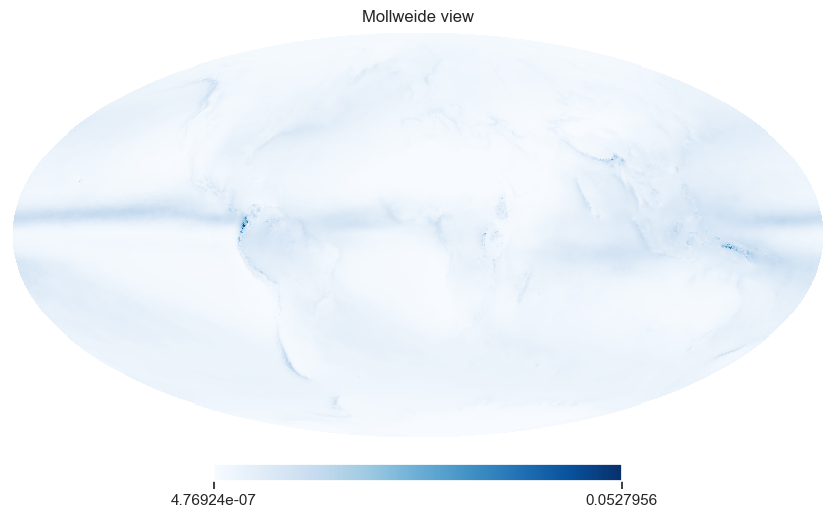

In [41]:
hp.mollview(pr_mean_obs, flip="geo",nest=True, cmap="Blues")

In [43]:
hera_cat.HERA5.describe()

{'name': 'HERA5',
 'container': 'xarray',
 'plugin': ['zarr'],
 'driver': ['zarr'],
 'description': 'Selected variables from ERA5, restructured and saved on the HEALPix grid.',
 'direct_access': 'forbid',
 'user_parameters': [{'name': 'zoom',
   'description': 'HEALPix zoom level',
   'type': 'int',
   'allowed': [7],
   'default': 7},
  {'name': 'time',
   'description': 'Temporal frequency',
   'type': 'str',
   'allowed': ['P1M', 'P1D', 'PT1H'],
   'default': 'P1M'}],
 'metadata': {'title': 'HERA5 - HEALPixelation of ERA5',
  'source': 'Post-processed dataset based on the ERA5 mirror located at DKRZ.',
  'creator': 'Lukas Kluft',
  'institution': 'Max Planck Institute for Meteorology',
  'contact': 'lukas.kluft@mpimet.mpg.de',
  'acknowledgment': 'Contains modified Copernicus Climate Change Service information 2020. Neither the European Commission nor ECMWF is responsible for any use that may be made of the Copernicus information or data it contains.'},
 'args': {'urlpath': ['https:

In [45]:
hera_daily = hera_cat.HERA5(time='P1D').to_dask()

/usr/local/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


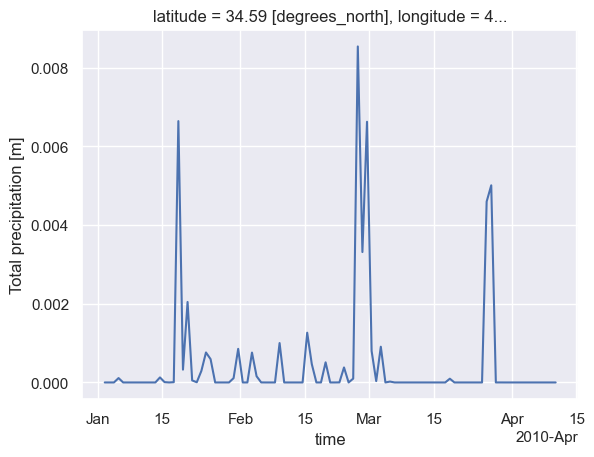

In [48]:
hera_daily.tp.isel(cell=4000,time=slice(1,100)).plot()

In [68]:
hera_hourly = hera_cat.HERA5(time='PT1H').to_dask()

/usr/local/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


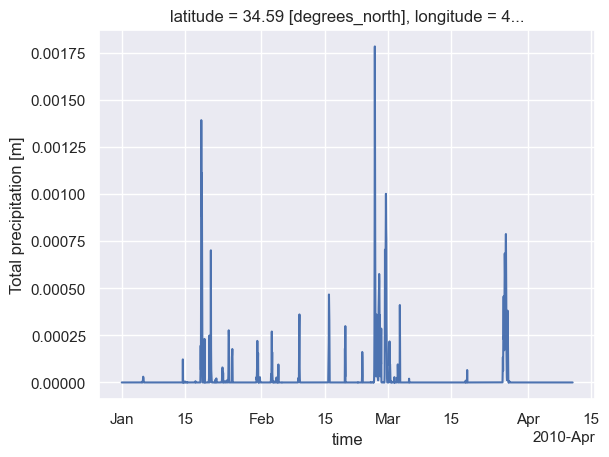

In [69]:
hera_hourly.tp.isel(cell=4000,time=slice(1,2400)).plot()

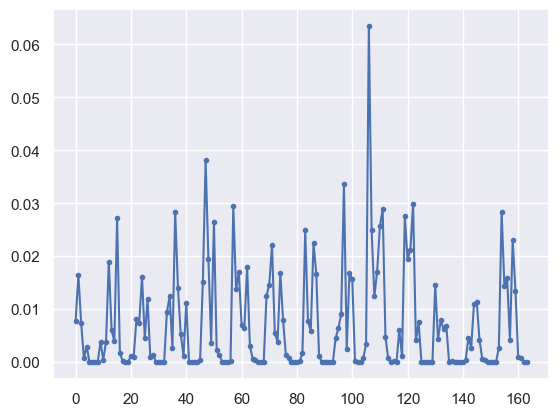

In [77]:
plt.plot(hera.tp.isel(cell=4000)*20, '.-')

In [71]:
hsum = hera_hourly.isel(cell=4000).coarsen(time=24, boundary='trim').sum()

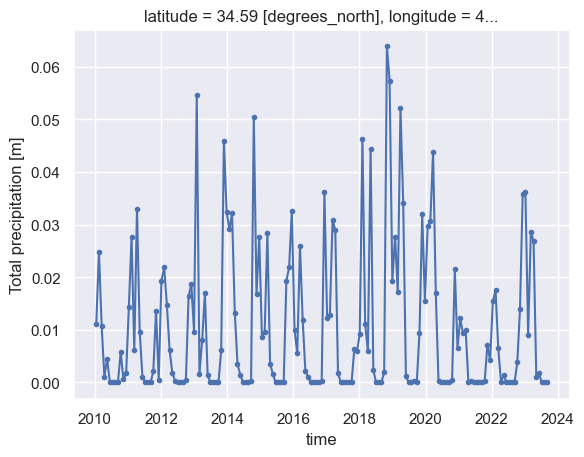

In [72]:
hsum.coarsen(time=30, boundary='trim').sum().tp.plot(marker='.')